## Importing Libraries

In [1]:
import os
from IPython.display import Image, display

## libraries for object detection
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox


2023-02-13 17:52:00.690380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 17:52:08.229165: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moro/.local/share/virtualenvs/dl_deploying_deep_learning_model-G50MbxWS/lib64/python3.10/site-packages/cv2/../../lib64:
2023-02-13 17:52:08.229236: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 17:52:42.396841: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc

### Image Inspection
Lets look at the images to pass to our YOLOV3 model.cvlib.object_detection


Display image: apple.jpg


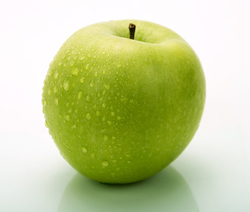


Display image: clock.jpg


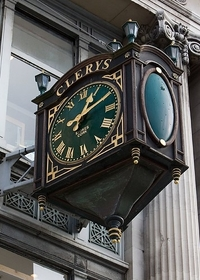


Display image: oranges.jpg


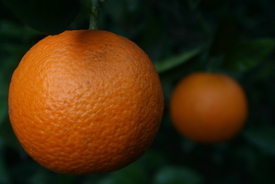


Display image: car.jpg


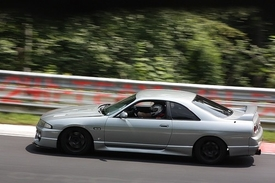

In [2]:
## selecting some images
images_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
]

for each_image in images_files:
    print(f'\nDisplay image: {each_image}')
    display(Image(filename=f"datasets/images/{each_image}"))

## Creating the detect_and_draw_box function

In [6]:
## lets create an empty directory to store resulting images.
dir_name = "datasets/images_with_boxes"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [7]:
def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """
    Detects common objects on an image and creates a new image with bounding boxes.
    
    Args:
        filename (str): Filename of the image.
        model (str): 
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """
    
    ##
    img_filepath = f'datasets/images/{filename}'
    
    ##
    img = cv2.imread(img_filepath)
    
    ##
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    
    ## 
    print(f"=======================\nImage processed: {filename}\n")
    
    ## Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f'Detected object: {l} with confidence level of {c}')
    
    ## Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    
    ## Save the image in the directory images_with_boxes
    cv2.imwrite(f'datasets/images_with_boxes/{filename}', output_image)
    
    ## Display the image with bounding boxes
    display(Image(f'datasets/images_with_boxes/{filename}'))

Image processed: apple.jpg

Detected object: apple with confidence level of 0.571723222732544


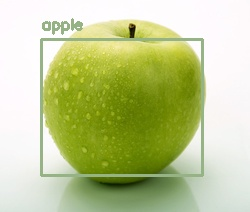

Image processed: clock.jpg

Detected object: clock with confidence level of 0.9683185815811157


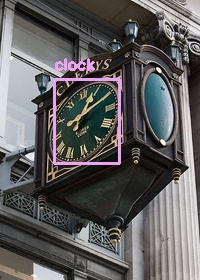

Image processed: oranges.jpg

Detected object: orange with confidence level of 0.6185582876205444
Detected object: orange with confidence level of 0.5561721324920654


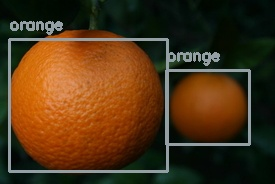

Image processed: car.jpg

Detected object: car with confidence level of 0.6325398683547974


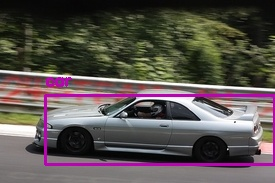

In [8]:
for each_image in images_files:
    detect_and_draw_box(each_image)

### Changing The Confidence Level

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818466544151306
Detected object: orange with confidence level of 0.5346412062644958
Detected object: orange with confidence level of 0.5150960087776184


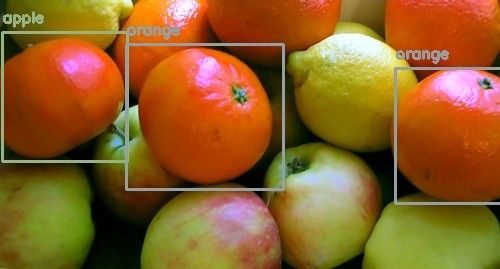

In [9]:
detect_and_draw_box("fruits.jpg")

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818466544151306
Detected object: orange with confidence level of 0.5346412062644958
Detected object: orange with confidence level of 0.5150960087776184
Detected object: apple with confidence level of 0.3475964665412903
Detected object: orange with confidence level of 0.32876119017601013
Detected object: apple with confidence level of 0.312446653842926
Detected object: orange with confidence level of 0.27986255288124084
Detected object: orange with confidence level of 0.27499815821647644
Detected object: apple with confidence level of 0.27445000410079956
Detected object: orange with confidence level of 0.21419215202331543


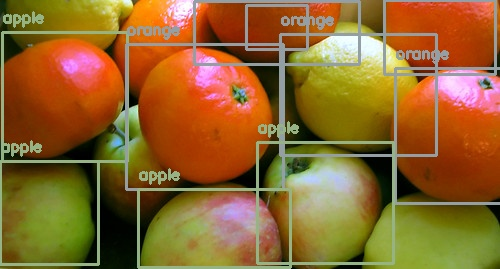

In [10]:
detect_and_draw_box("fruits.jpg", confidence=0.2)

### Deploying The Model Using FastAPI.